# Loan Prediction using ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [24]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
df.shape

(614, 13)

In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
  # Dealing with Categorical values
    
# Gender Column
df['Gender'] =  df['Gender'].map({'Male':0,'Female':1})

# Married column
df['Married'] = df['Married'].map({'No':0,'Yes':1})

# Loan_Status column
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})

In [29]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,1.0,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,1.0,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,1.0,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


# Filling Missing Values


In [30]:
# Gender column 
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [31]:
# Married column
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [32]:
# Dependents Column
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [33]:
# Self_Employed Column
df['Self_Employed'].fillna('No',inplace=True)

In [34]:
# Credit_History Column
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [35]:
# LoanAmount Column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [36]:
# Loan_Amount Column
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Exploratory Data Analysis

In [37]:
# Counting the accurance of each value in Gender column
df['Gender'].value_counts()

0.0    502
1.0    112
Name: Gender, dtype: int64

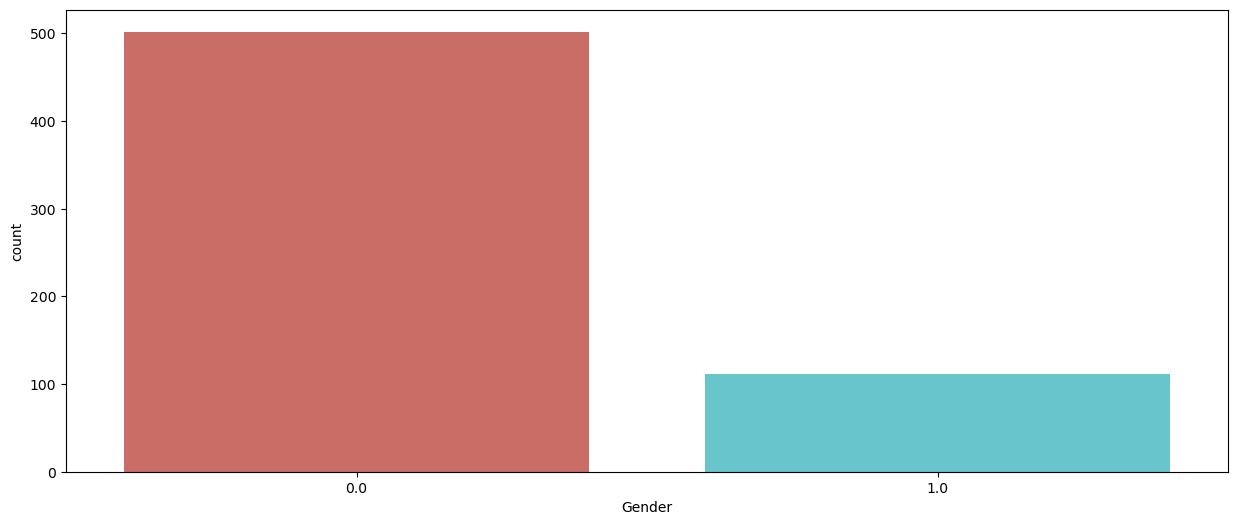

In [38]:
plt.figure(figsize=(15,6))
sns.countplot('Gender', data= df, palette = 'hls' )
plt.show()

In [39]:
# Counting the accurance of each value in Dependent column
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

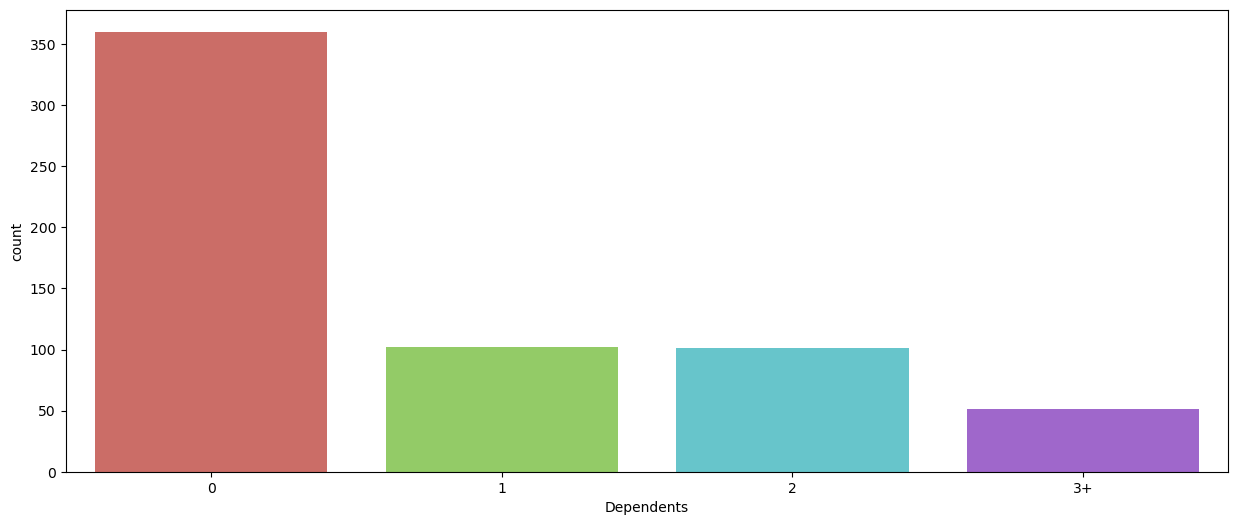

In [40]:
plt.figure(figsize=(15,6))
sns.countplot('Dependents', data = df, palette='hls')
plt.show()

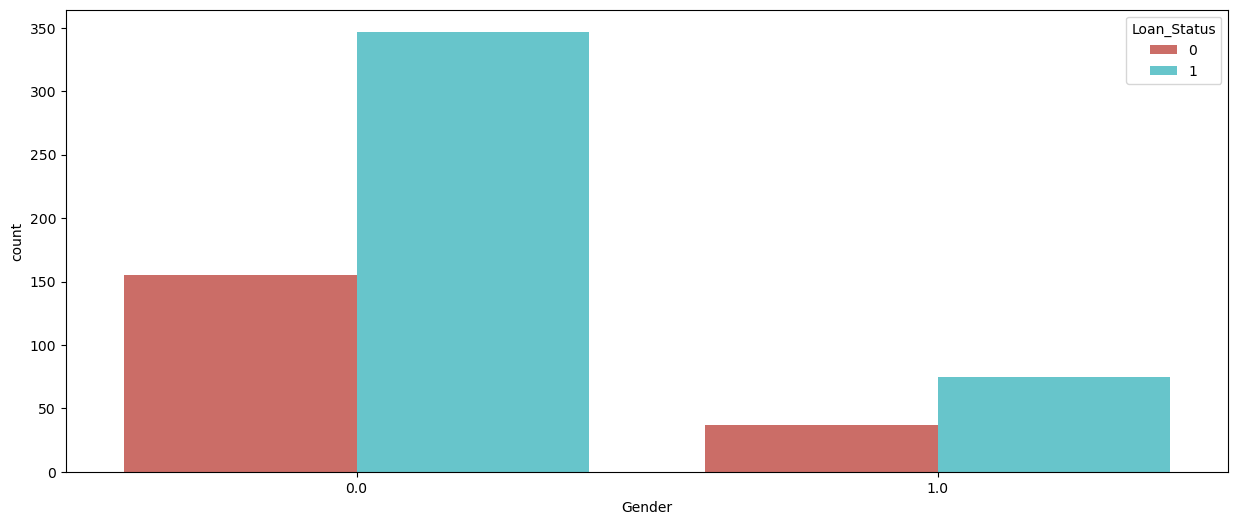

In [41]:
# comparing loan status with gender column
plt.figure(figsize=(15,6))
sns.countplot(x = 'Gender',hue ='Loan_Status', data=df , palette='hls')
plt.show()

<AxesSubplot:xlabel='Married', ylabel='count'>

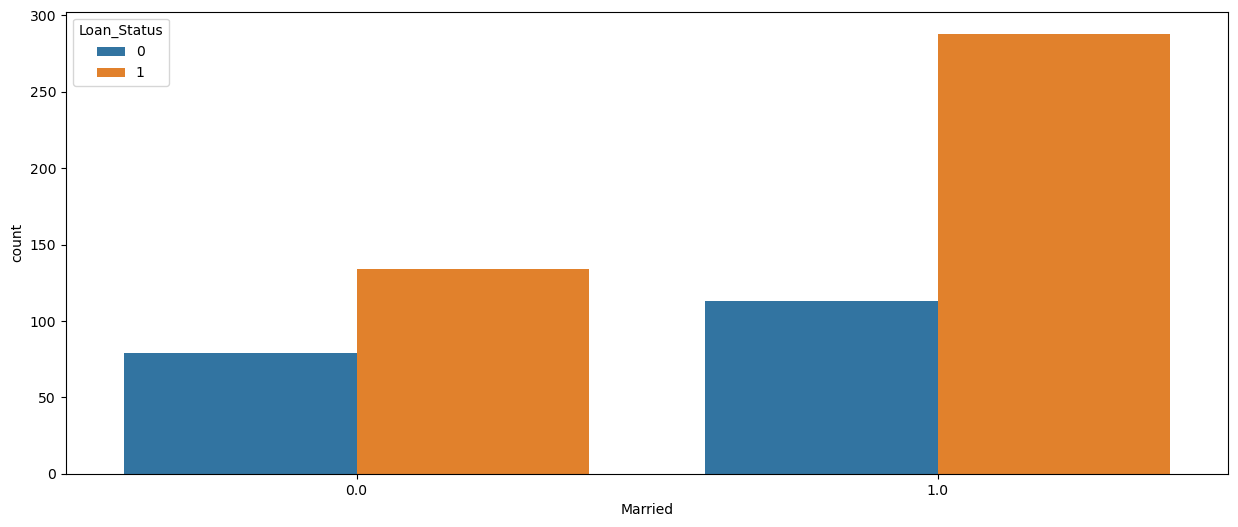

In [43]:
# comparing loan status with married column
plt.figure(figsize = (15,6))
sns.countplot( x='Married', hue ='Loan_Status', data = df)

In [44]:
#Counting the occurence of each value with Loan_amount_term column
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

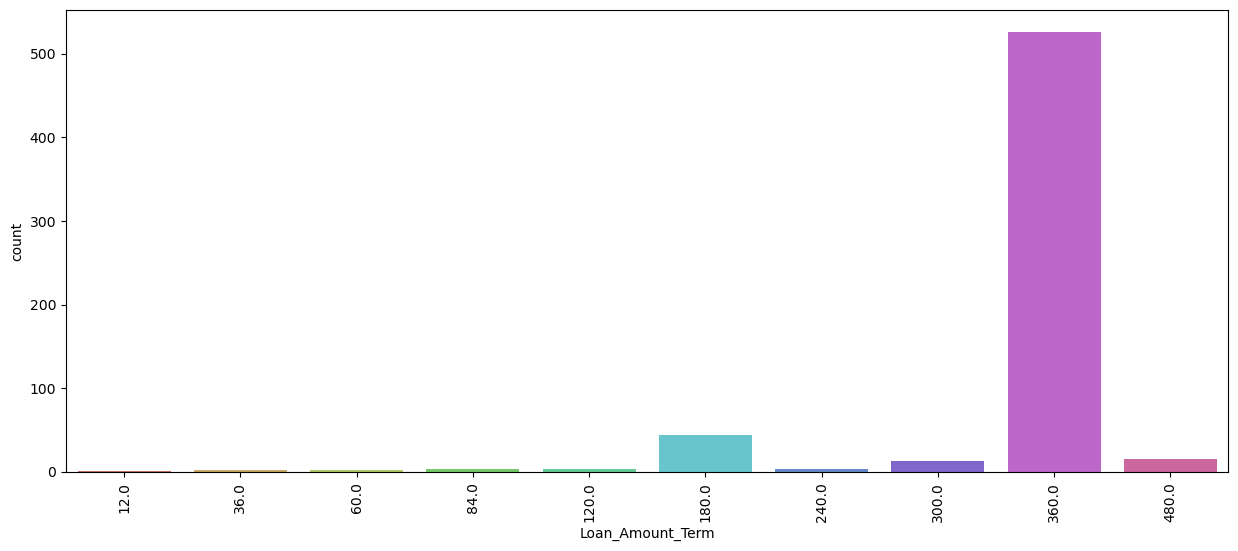

In [45]:
plt.figure(figsize=(15,6))
sns.countplot('Loan_Amount_Term', data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

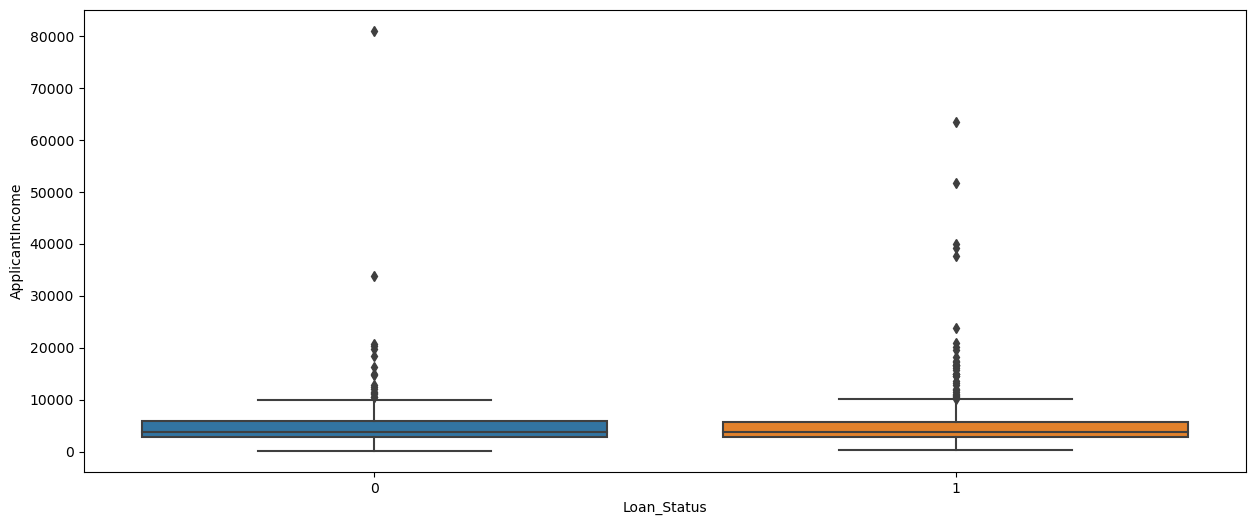

In [46]:
# plotting boxplot
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y = 'ApplicantIncome', data=df)
plt.show()

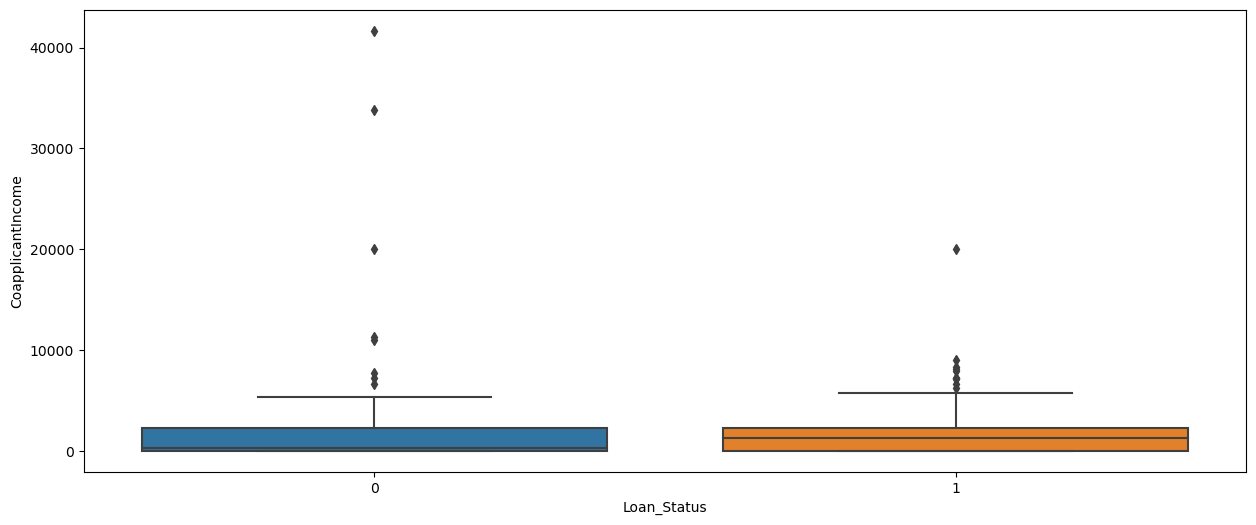

In [47]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y = 'CoapplicantIncome', data=df)
plt.show()

<AxesSubplot:>

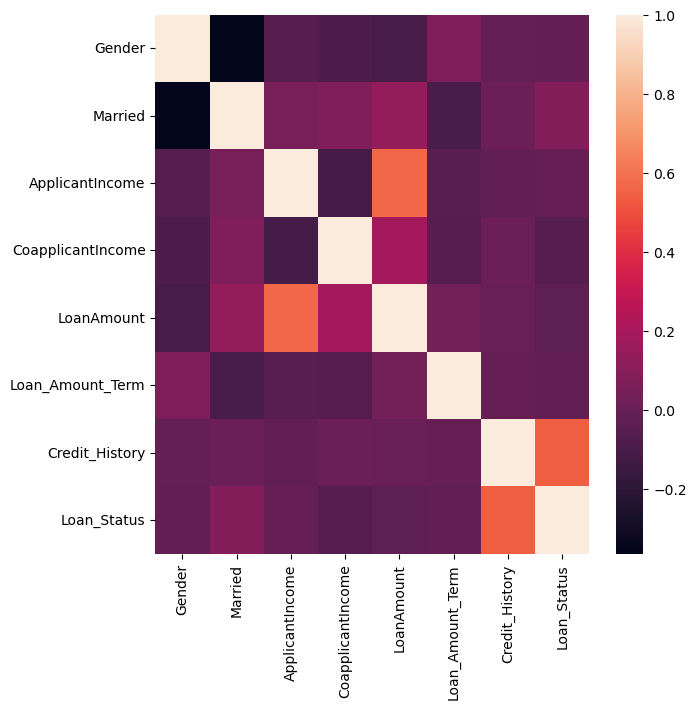

In [48]:
# Showing correlation through heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

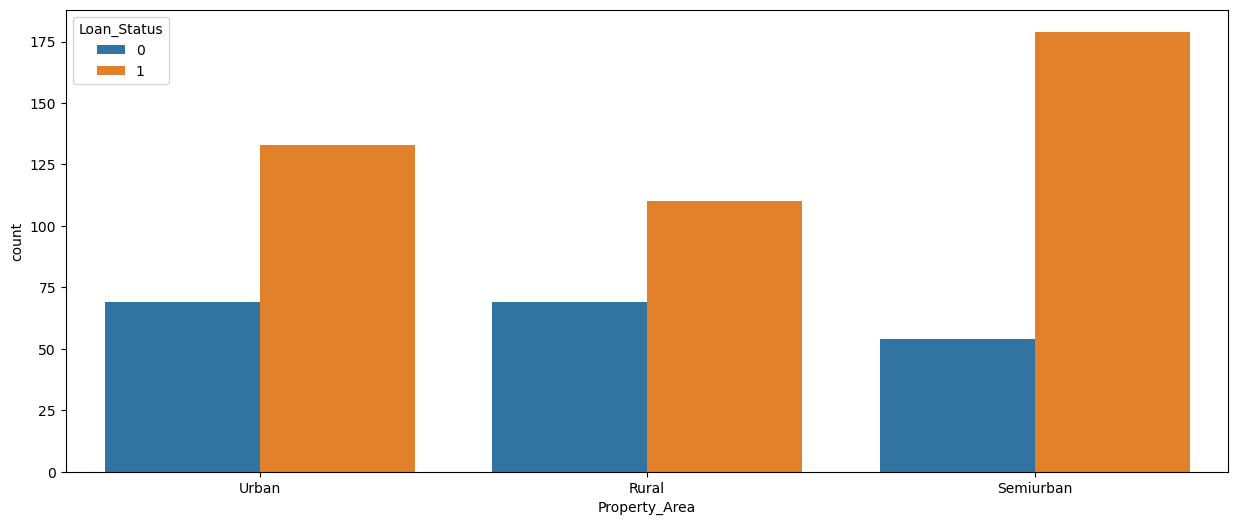

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Property_Area', hue='Loan_Status', data = df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

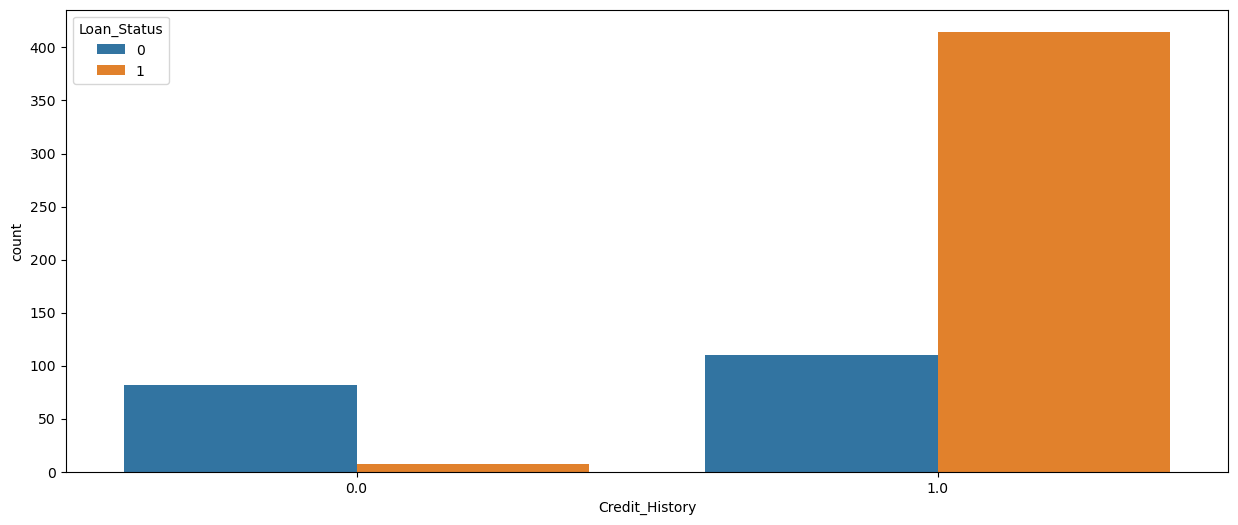

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Credit_History', hue='Loan_Status', data = df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

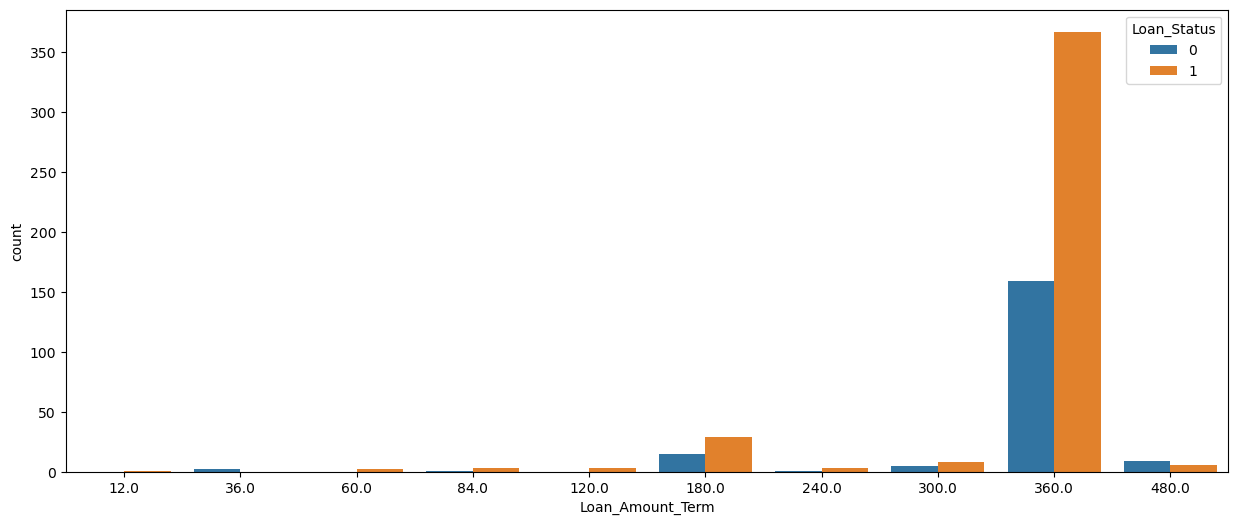

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Loan_Amount_Term', hue='Loan_Status', data = df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

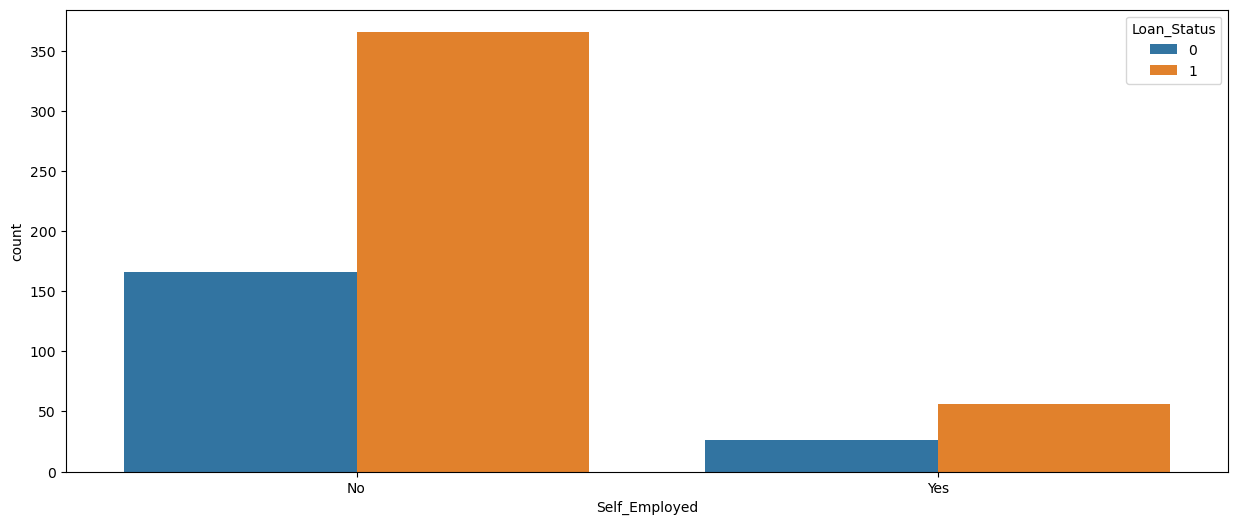

In [52]:
plt.figure(figsize=(15,6))
sns.countplot( x = 'Self_Employed', hue = 'Loan_Status', data = df)

# Model Building and Prediction

In [55]:
X = df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
'Credit_History']]
y = df.Loan_Status

In [56]:
# Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2,
random_state = 10)

# Random forest algorithm

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [59]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7967479674796748

In [60]:
pred_train = model.predict(x_train)
print("Accuracy: ",accuracy_score(y_train,pred_train))

Accuracy:  0.8167006109979633


# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_train) 
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.8126272912423625


# Linear svm

In [64]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
model.fit(x_train, y_train)

SGDClassifier(alpha=0.001, max_iter=15, random_state=5, tol=None)

In [65]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_train)
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.6822810590631364
